# Milestone 3: Data Analysis

By: Antony Richardson, Austin McGaugh, Daches Choji Bitrus

Date: May 1, 2019

### Introduction

For the project, we decided to look at the “Craigslist Cars+Trucks” dataset. This dataset has 1.72 million entries spread across 20 columns that include information such as the make, model, price, condition, odometer reading, and more. With this information, we can help potential buyers and sellers as well as craigslist competitors such as used car dealerships properly list and browse vehicles. We can work with these groups of people to ensure they are getting the best deals by answering the following questions:


* What make sold best?

* Where were certain vehicles selling better?

* What colors were selling the best?

* What was the average price of certain vehicles?

* What model was selling best?

* What was the average odometer reading vehicles being sold?

Using these questions we can help used car dealerships as well as craigslist buyers/sellers better understand the used car market in their area. For dealerships craigslists acts as one of their primary competitors since its a popular and easy way for individuals to buy and sell cars on their own without having to go through dealerships. Because of this its very important that dealerhips have constant data about whats is being sold on craigslist where and for what price, so that they can stay competitive in this changing marketplace. Buyers and sellers will also benefit from this data for similar reasons. Since they will be planning to buy and sell in their market they can use this information to easily see what value certains types of vehicles have in their area. This will help them competitively sell their vehicle and avoid overpaying.

Since we are trying to gather data for used car buying and selling we remove "outliers" that are too far from a typical used vehicle and will skew data away from the demographic we are trying to serve.

### Data Source and Collection

Our dataset was sourced from kaggle.com.The dataset was posted on kaggle.com by Austin Reese in October 2018 and updated three months ago. Austin Reese originally scraped the data from Craiglist.com. 

The data is a compilation of unique car postings on Craigslist between the period of September and November 2018. The dataset comprises 1.7 million observations with 20 variables. Some of the observations contain missing information but this data is mostly a complete representation of used vehicles on Craigslist in the North-American region.

The dataset is in its ‘raw’ form and has not yet been cleaned.

Here is a link to the dataset:  
https://www.kaggle.com/austinreese/craigslist-carstrucks-data/home

### Objectives
Our aim and objectives for this project are as follows;
1. Perform data analytics and machine learning on the dataset to develop a trend that would provide valuable information to car dealers and buyers at the sametime.
2. To apply data management techniques on the dataset such as data cleaning.
3. To create a visual representation of the data based on relational modeling.



### Data Manipulation and Visualization
   For our data to be explored and understood, we would need to clean, manipulate and visualize it to able to draw some useful insights from the dataset. Below is a list of packages we would be using to achieve our task of manipulating and visualizing the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import missingno as msno
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

### Reading in the dataset

In [3]:
dat = pd.read_csv("craigslistVehiclesFull.csv")

### Display Observatons and Variables ###
   The dataset being explored consist of about 1.7 million observations and 26 variables. Below is the head method that displays the first 5 rows of the dataset and all the variables.

In [4]:
dat.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


### Data Cleaning ###

#### Viewing Missing Values (NaN)
In order to know how many values the dataset is missing, we need to be able to call our dataset showing which variables contain missing values. The msno.matrix() method used in the code below produces our dataset showing us how many values our dataset is missing. From this visualization we are able to understand our data more closely and able to tell if dropping the missing observations would limit the insight of our dataset. The matrix Shows data density over the whole plane, and shows a sparkline to the left showing row by row variation in count of Na values. 

   The msno.bar() method shows a direct count of the missing values in each variable.


In [6]:
print(dat.isnull().sum())

url                   0
city                  0
price                 0
year               6315
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
odometer         564054
title_status       2554
transmission       9022
vin             1118215
drive            661884
size            1123967
type             702931
paint_color      695650
image_url             1
lat                   0
long                  0
county_fips       58833
county_name       58833
state_fips        58833
state_code        58833
state_name            0
weather           59428
dtype: int64


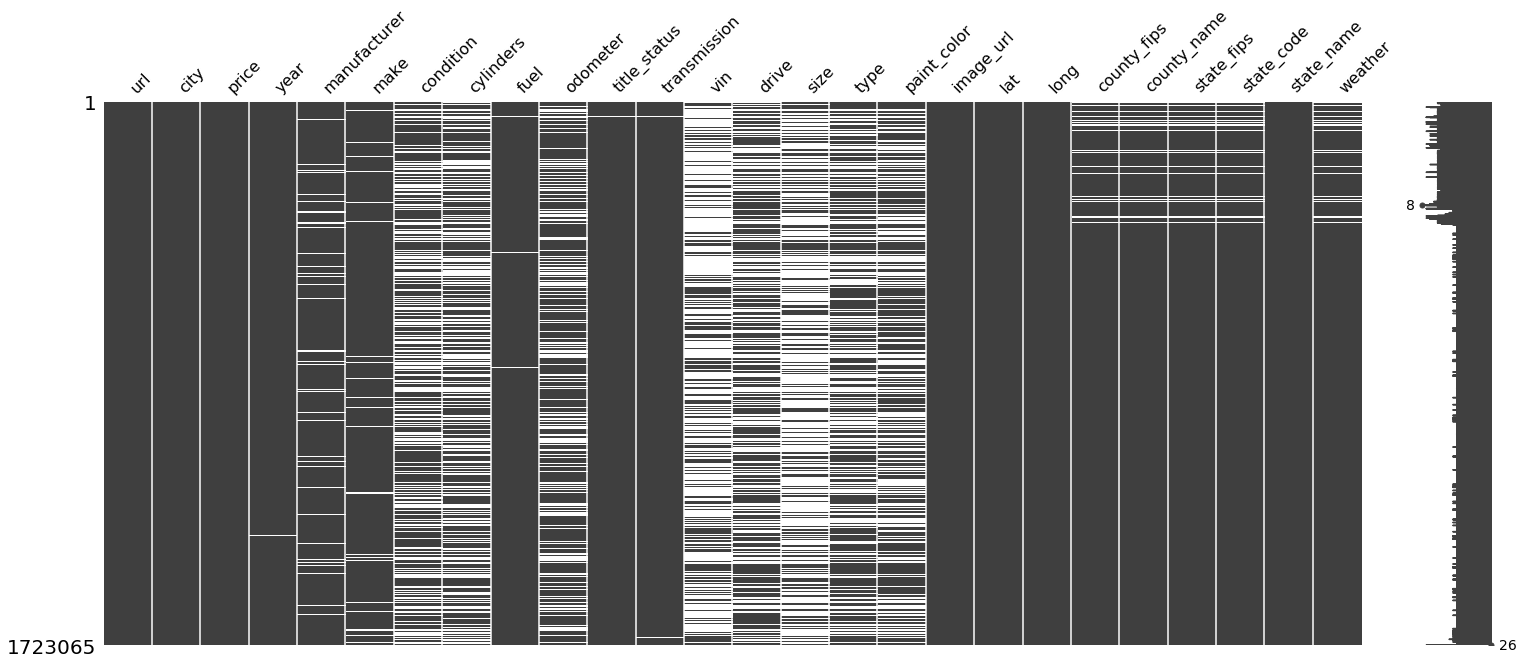

In [7]:
msno.matrix(dat)

#### Cleaning the Manufacturers column
We performed data cleansing on the 'manufacturers' column in order to properly identify each car brand without ambiguity. Here we replaced abbreviations and short written names with full brand names to provide a clarity.


In [8]:
#show all manufacturers
dat['manufacturer'].unique()

array(['dodge', nan, 'ford', 'gmc', 'jeep', 'bmw', 'chev', 'chevrolet',
       'hyundai', 'honda', 'ram', 'acura', 'kia', 'volkswagen', 'nissan',
       'audi', 'mercedes-benz', 'subaru', 'chrysler', 'toyota', 'rover',
       'mazda', 'chevy', 'cadillac', 'mercedes', 'infiniti', 'lexus',
       'mini', 'saturn', 'vw', 'lincoln', 'mitsubishi', 'buick',
       'mercury', 'fiat', 'pontiac', 'volvo', 'jaguar', 'datsun',
       'infinity', 'ferrari', 'harley', 'alfa', 'porche', 'noble',
       'land rover', 'landrover', 'harley-davidson', 'alfa-romeo',
       'mercedesbenz', 'aston', 'aston-martin', 'morgan', 'hennessey'],
      dtype=object)

In [9]:
#rename similar manufacturers
dat = dat.replace('ram','dodge')
dat = dat.replace('chevrolet','chevy')
dat = dat.replace('mercedes-benz','mercedes')
dat = dat.replace('mercedesbenz','mercedes')
dat = dat.replace('land rover','landrover')
dat = dat.replace('chev','chevy')
dat = dat.replace('aston','aston-martin')
dat = dat.replace('alpha-romeo','alpha')
dat = dat.replace('harley-davidson','harley')
dat['manufacturer'].unique()

array(['dodge', nan, 'ford', 'gmc', 'jeep', 'bmw', 'chevy', 'hyundai',
       'honda', 'acura', 'kia', 'volkswagen', 'nissan', 'audi',
       'mercedes', 'subaru', 'chrysler', 'toyota', 'rover', 'mazda',
       'cadillac', 'infiniti', 'lexus', 'mini', 'saturn', 'vw', 'lincoln',
       'mitsubishi', 'buick', 'mercury', 'fiat', 'pontiac', 'volvo',
       'jaguar', 'datsun', 'infinity', 'ferrari', 'harley', 'alfa',
       'porche', 'noble', 'landrover', 'alfa-romeo', 'aston-martin',
       'morgan', 'hennessey'], dtype=object)

### Find and remove key outliers

##### Since we are trying to gather data for used car buying and selling we remove "outliers" that are too far from a typical used vehicle and will skew data away from the demographic we are trying to serve.
Removing outliers is an important step in data cleansing and exploration because outliers do not show any relevant correlation with the overall data. Removing outliers will help us condense our dataset revealing actual values that have an insightful correlation with other values.

   In determining outliers, we use the box plot method to visualize the data on selected variables to see the outliers that can be removed. After removing the outliers, we show the box plot with the outliers removed and this gives us a good idea on the distribution of data in each variable.

In [10]:
#Get all odometer readings and set them to odo
odo = dat['odometer']

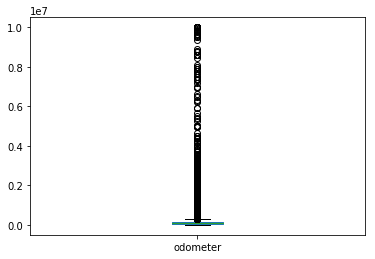

In [11]:
#Create a box plot from odo to find outliers
odo.plot.box()

In [12]:
#remove outliers and show the mean odometer reading
#After trial and error outlier removal 280000 was the number that managed to remove all outliers
odo2 = odo[odo < 280000]
odo2.mean()

106457.88289698274

In [13]:
#get all prices
price = dat['price']

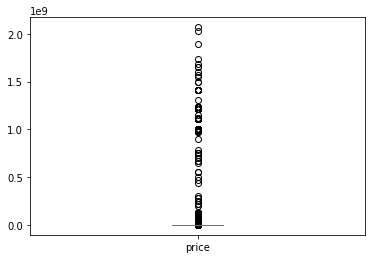

In [14]:
#box plot to show all price outliers
plot3 = price.plot.box()

In [15]:
#remove outliers and get mean of price
#After trail and error outlier removal 26000 was the number that managed to remove all outliers
price2 = price[price < 26000]
price2.mean()

8206.906977056467

In [16]:
#get all years
year = dat['year']

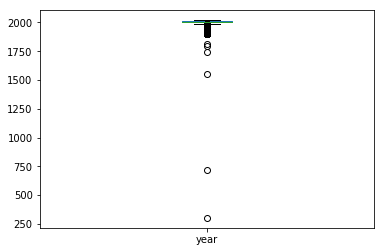

In [17]:
year.plot.box()

In [18]:
#remove outliers and get mean for year
#There can't be any car before 1885 since that was when the first ever car was invented
year2 = year[year>1885]
year2.mean()

2004.8432328873728

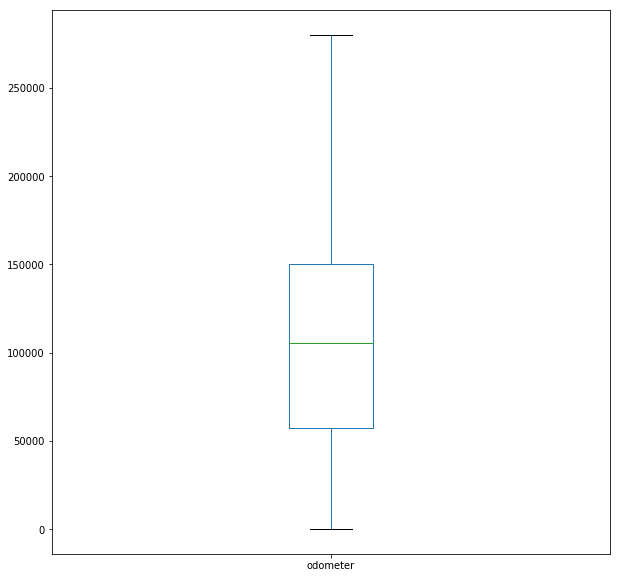

In [19]:
#Create odometer boxplot with outliers removed
odo2.plot.box(figsize = (10,10))

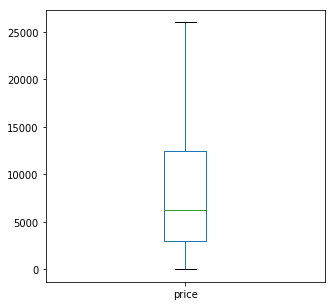

In [20]:
#create price boxplot with outliers removed
plot4 = price2.plot.box(figsize = (5,5))

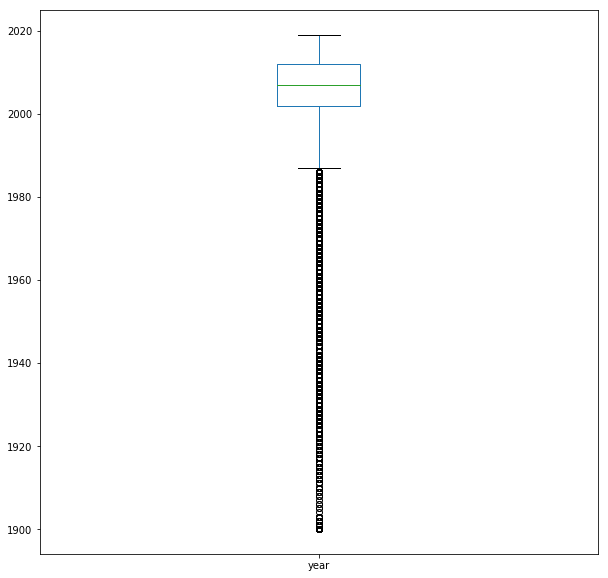

In [21]:
#create year box plot with outliers removed
year2.plot.box(figsize = (10,10))

### Correlation Analysis and Summary Statistics
Correlation analysis shows the relationship between the variables in our dataset. Here, we picked the variables that are most important in telling our story of the used car market (price, year, odometer, and weather) and performed a correlation analysis these variables. We plotted a heat map to visually understand the correlation between these variables; whether the correlation is a strong one or a weak one.

In [22]:
#get the price year odometer and weather values
dat2 = dat[['price','year','odometer','weather']]
#drop nan values
dat2 = dat2.dropna()
#remove outliers
dat2 = dat2.drop(dat2[dat2.price > 26000].index)
dat2 = dat2.drop(dat2[dat2.odometer > 280000].index)
dat2 = dat2.drop(dat2[dat2.year < 1885].index)
#do correlation analysis
dat2.corr(method='pearson')

,price,year,odometer,weather
price,1.000000,0.409108,-0.429414,-0.008234
year,0.409108,1.000000,-0.242832,0.027017
odometer,-0.429414,-0.242832,1.000000,-0.038453
weather,-0.008234,0.027017,-0.038453,1.000000


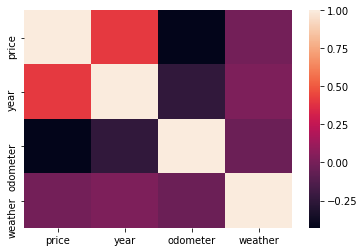

In [23]:
#create correlation heatmap
#Weather indicates the historical average temperature in the months of october and november.
sns.heatmap(dat2.corr()) 

This plot shows how price, year, odometer, and weather are correlated. Weather is the historical average temperature in the months of october and november which is a good indicator as to how temperature affects buying habits.

In [24]:
#summary statistics
dat2.describe()

,price,year,odometer,weather
count,982896.000000,982896.000000,982896.000000,982896.000000
mean,9263.700328,2006.510109,113556.854027,53.432984
std,6593.229027,8.471429,60267.094300,7.678130
min,1.000000,1900.000000,0.000000,29.000000
25%,3900.000000,2003.000000,70000.000000,48.000000
50%,7500.000000,2008.000000,114000.000000,53.000000
75%,13950.000000,2012.000000,155000.000000,59.000000
max,26000.000000,2019.000000,280000.000000,79.000000


## -------------------------------------------------------------------------------------------------------------------------

### Barchart of 10 cities with the highest average price and 10 with the lowest

In [25]:
to_drop = ['FAILED']
dat3 = dat[~dat['state_name'].isin(to_drop)]

In [26]:
#get the city and price
cityPrice = dat3[['city','price']]
#drop nan values
cityPrice = cityPrice.dropna()
#remove the prices we know to be outliers
cityPrice = cityPrice.drop(cityPrice[cityPrice.price > 26000].index)

In [27]:
#get the city and mean price
cityPrice = cityPrice.groupby(['city']).mean()

In [28]:
#get the top 10 cities by highest mean price
cityPriceLarge = cityPrice.nlargest(10,'price')
cityPriceLarge

,price
city,
vancouver,19999.000000
bismarck,13062.890688
wichitafalls,12612.998879
pullman,12458.829254
corpuschristi,12159.872840
onslow,12130.101819
moseslake,11977.821941
wenatchee,11550.605484
enid,11497.119718


[Text(0, 0, 'Vancouver WA'),
 Text(0, 0, 'Bismarck ND'),
 Text(0, 0, 'Wichita Falls TX'),
 Text(0, 0, 'Pullman WA'),
 Text(0, 0, 'Corpuschristi TX'),
 Text(0, 0, 'Onslow NC'),
 Text(0, 0, 'Moseslake WA'),
 Text(0, 0, 'Wenatchee WA'),
 Text(0, 0, 'Enid OK'),
 Text(0, 0, 'Fairbanks AK')]

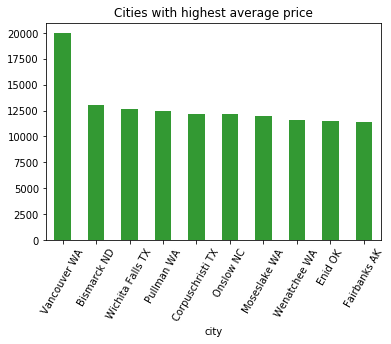

In [29]:
x_labels = ['Vancouver WA', 'Bismarck ND', 'Wichita Falls TX', 'Pullman WA', 'Corpuschristi TX', 'Onslow NC',
            'Moseslake WA', 'Wenatchee WA', 'Enid OK', 'Fairbanks AK']
fig, ax = plt.subplots()
#create a boxplot for the top 10 cities
cityPriceLarge.head(10)['price'].plot(kind='bar', 
                                 color='green', 
                                 title = 'Cities with highest average price',
                                 alpha=0.8)
plt.xticks(rotation=60)
ax.set_xticklabels(x_labels)

This graph shows the 10 cities with states attached that have the highest average cost per vehicle. Vancouver only had 1 car listed for 19999.

In [30]:
#get the 10 cities with lowest mean price
cityPriceSmall = cityPrice.nsmallest(10,'price')

[Text(0, 0, 'Territories'),
 Text(0, 0, 'Sherbrooke'),
 Text(0, 0, 'Houma'),
 Text(0, 0, 'Pei'),
 Text(0, 0, 'Martinsburg'),
 Text(0, 0, 'Oneonta'),
 Text(0, 0, 'Janesville'),
 Text(0, 0, 'Troisrivieres'),
 Text(0, 0, 'Delrio'),
 Text(0, 0, 'Ogden')]

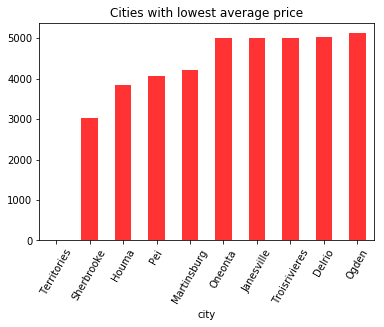

In [31]:
x_labels = ['Territories', 'Sherbrooke', 'Houma', 'Pei', 'Martinsburg', 'Oneonta', 'Janesville',
            'Troisrivieres', 'Delrio', 'Ogden']
fig, ax = plt.subplots()
#create a boxplot for the bottom 10 cities
cityPriceSmall.head(10)['price'].plot(kind='bar', 
                                 color='red', 
                                 title = 'Cities with lowest average price',
                                 alpha=0.8)
plt.xticks(rotation=60)
ax.set_xticklabels(x_labels)

This graph shows the 10 last cities in terms of average cost. Most of these cities only have 1 vehicle listed so its really not a very useful graph for viewing averages.

### Which manufacturer is most prevalent in each state

In [32]:
#get the state and manufactuerer
stateManu = dat3[['state_code','manufacturer']]
#drop nan values
stateManu = stateManu.dropna()

In [33]:
#Show the most popular brand in each state
stateManu = stateManu.groupby(['state_code']).agg(lambda x:x.value_counts().index[0])
stateManu

,manufacturer
state_code,
AK,ford
AL,chevy
AR,chevy
AZ,ford
CA,ford
CO,ford
CT,ford
DC,toyota
DE,ford


This list shows the top selling manufacturer per state.

### Average price per manufacturer
The average price per manufacturer is an important varible that can guide a buyer's decision. Having an overall look at the average price will allow a buyer to make decisions base on budget as well as understand the price differences between brands. 

In [34]:
#get the manufactuerer and 
manuPrice = dat[['manufacturer','price']]
#drop nan values
manuPrice = manuPrice.dropna()
#remove price outliers
manuPrice = manuPrice.drop(manuPrice[manuPrice.price > 26000].index)

In [35]:
#show each manufacturer by average price sold
manuPrice = manuPrice.groupby(['manufacturer']).mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

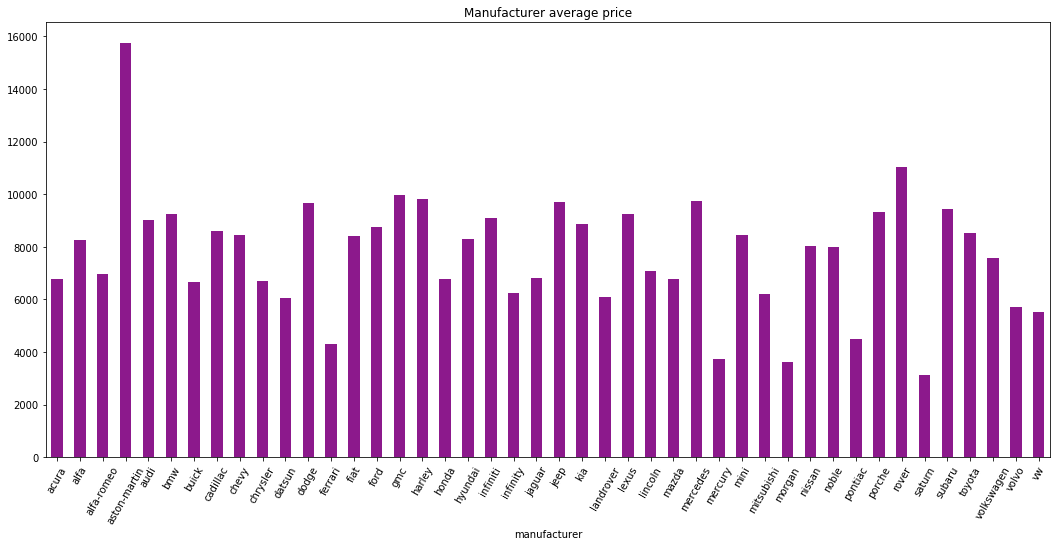

In [36]:
#plot the manufactuerer by average price
manuPrice['price'].plot(kind='bar', 
                            title = 'Manufacturer average price',
                            figsize=(18,8),
                            alpha=0.9,
                            color='purple')
plt.xticks(rotation=60)

This graph shows the average price per manufacturer

### Overall 20 most prevalent manufacturers on craigslist

In [37]:
#get the manufacturer; drop nan values and count the amount of times it appears
manuCounts = dat['manufacturer'].dropna().value_counts()

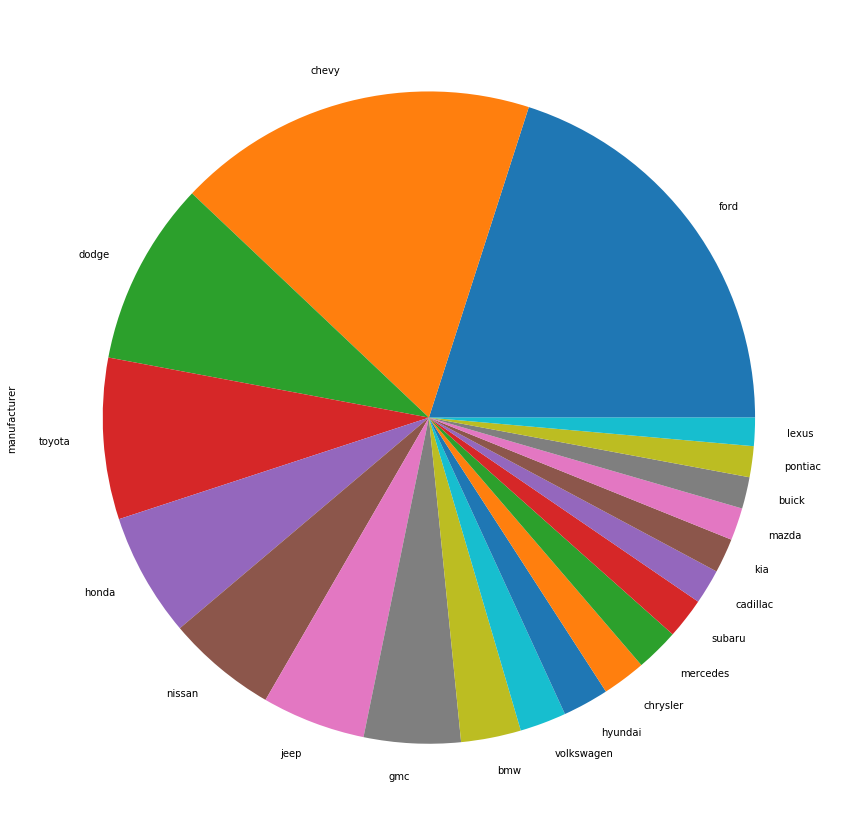

In [38]:
#plot the top 20 manufactuerers 
manuCounts.head(20).plot.pie(y='mass', figsize=(15, 15))

The pie plot above shows that Chevrolet and Ford are the most patronized car brands in the used car market followed by Dodge, Toyota and Honda.

### Hexbin of price by years

In [39]:
#get the year and price
yearPrice = dat[['year','price']]
#drop nan values
yearPrice = yearPrice.dropna()
#remove year outliers
yearPrice = yearPrice.drop(yearPrice[yearPrice.year < 1885].index)
#remove price outliers
yearPrice = yearPrice.drop(yearPrice[yearPrice.price > 26000].index)

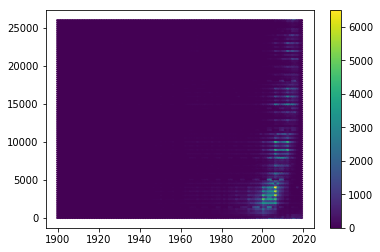

In [40]:
#Hexbin year by price
x = yearPrice['year']
y = yearPrice['price']

plt.hexbin(x, y, gridsize=(100,100))
plt.colorbar()
plt.show()

This hexbin shows how as the vehicle gets newer the price increases. The grid like pattern is due to the fact that the car years are whole numbers and the prices tend to be divisible by 1000.

In [41]:
#get the year and price
yearPrice2 = dat[['year','price']]
#drop nan values
yearPrice2 = yearPrice2.dropna()
#remove year outliers
yearPrice2 = yearPrice2.drop(yearPrice2[yearPrice2.year < 1980].index)
#remove price outliers
yearPrice2 = yearPrice2.drop(yearPrice2[yearPrice2.price > 26000].index)

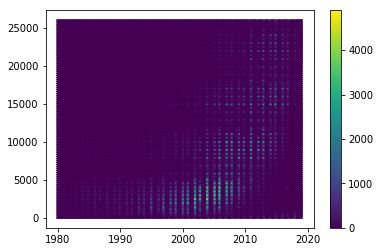

In [42]:
#Hexbin year by price
x = yearPrice2['year']
y = yearPrice2['price']

plt.hexbin(x, y, gridsize=(100,100))
plt.colorbar()
plt.show()

### Hexbin of odometer reading by price

In [43]:
#get odometer reading and price
odoPrice = dat[['odometer','price']]
#drop nan values
odoPrice = odoPrice.dropna()
#remove odometer outliers
odoPrice = odoPrice.drop(odoPrice[odoPrice.odometer > 280000].index)
#remove price outliers
odoPrice = odoPrice.drop(odoPrice[odoPrice.price > 26000].index)

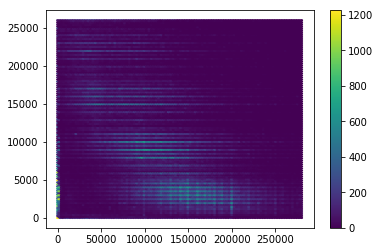

In [44]:
#Hexbin price by odometer reading
x = odoPrice['odometer']
y = odoPrice['price']

plt.hexbin(x, y, gridsize=(100,100))
plt.colorbar()
plt.show()

This hexbin shows how as the odometer reading rises the price falls. The reasons for the lines streaking across is because people tend to sell their vehicle on whole numbers divisible by 1000.

## -------------------------------------------------------------------------------------------------------------------------

# Regression Analysis

In [44]:
dat.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [45]:

temp_lin = dat[['price','odometer']]
temp_lin = temp_lin.dropna()
temp_lin = temp_lin .drop(temp_lin [temp_lin .price > 26000].index)
temp_lin  = temp_lin .drop(temp_lin [temp_lin .odometer > 280000].index)
X4 = temp_lin['odometer']
y4 = temp_lin['price']

In [46]:
mod = sm.OLS(y4,X4)

In [47]:
fit = mod.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 5.785e+05
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        18:11:36   Log-Likelihood:            -1.0739e+07
No. Observations:             1018665   AIC:                         2.148e+07
Df Residuals:                 1018664   BIC:                         2.148e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
odometer       0.0537   7.06e-05    760.562      0.000       0.054       0.054
==============================================================================
Omnibus:                    68610.321   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53952.064
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       2.395   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
dat['fuel'].value_counts()

gas         1531426
diesel       121712
other         46161
hybrid        10945
electric       2454
Name: fuel, dtype: int64

In [49]:
temp = dat.drop(['url', 'city', 'manufacturer', 
            'make', 'condition', 'image_url', 'lat', 'long', 
            'county_fips', 'county_name', 'state_fips', 'state_code', 
            'state_name', 'title_status', 'transmission', 
            'vin', 'drive', 'size', 'type', 'paint_color', 'cylinders'], axis=1)
temp = temp.dropna()
temp  = temp.drop(temp [temp .odometer > 280000].index)
temp = temp.drop(temp[temp.year < 1885].index)
y = temp['price']
X = pd.concat([temp, pd.get_dummies(temp['fuel'])], axis=1)
X = X.drop(['price','fuel'], axis=1)

In [50]:
mod_full = sm.OLS(y,X).fit()

mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.176
Date:                Sun, 05 May 2019   Prob (F-statistic):             0.0331
Time:                        18:11:37   Log-Likelihood:            -1.8538e+07
No. Observations:             1085414   AIC:                         3.708e+07
Df Residuals:                 1085406   BIC:                         3.708e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year       -2090.7005    716.289     -2.919      0.004   -3494.603    -686.798
odometer      -0.2020      0.103     -1.962      0.050      -0.404      -0.000
weather     1325.7200    784.955      1.689      0.091    -212.764    2864.204
diesel      4.236e+06   1.44e+06      2.938      0.003    1.41e+06    7.06e+06
electric    4.166e+06   1.45e+06      2.867      0.004    1.32e+06    7.01e+06
gas         4.195e+06   1.44e+06      2.911      0.004    1.37e+06    7.02e+06
hybrid      4.189e+06   1.45e+06      2.899      0.004    1.36e+06    7.02e+06
other       4.195e+06   1.44e+06      2.906      0.004    1.37e+06    7.02e+06
==============================================================================
Omnibus:                  5270966.531   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   75860435270921.625
Skew:                         195.411   Prob(JB):                         0.00
Kurtosis:                   40956.951   Cond. No.                     6.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check Multicolinearity Issues

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])], 
          index=X.columns)

year            1.088688
odometer        1.092739
weather         1.001074
diesel       3707.547207
electric       74.234806
gas         50305.202769
hybrid        428.548554
other        1853.666321
dtype: float64

The fuel types all have multicolinearity issues

In [53]:
temp2 = dat.drop(['url', 'city', 'manufacturer', 
            'make', 'condition', 'image_url', 'lat', 'long', 
            'county_fips', 'county_name', 'state_fips', 'state_code', 
            'state_name', 'title_status', 'transmission', 
            'vin', 'drive', 'size', 'type', 'paint_color', 'cylinders', 'fuel'], axis=1)
temp2 = temp2.dropna()
temp2 = temp2 .drop(temp2 [temp2 .price > 26000].index)
temp2  = temp2.drop(temp2 [temp2 .odometer > 280000].index)
temp2 = temp2.drop(temp2[temp2.year < 1885].index)
y2 = temp2['price']
X2 = temp2.drop(['price'], axis=1)

In [54]:
mod_full = sm.OLS(y2,X2).fit()
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 8.771e+05
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        18:11:43   Log-Likelihood:            -9.9338e+06
No. Observations:              982896   AIC:                         1.987e+07
Df Residuals:                  982893   BIC:                         1.987e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           8.0581      0.022    368.331      0.000       8.015       8.101
odometer      -0.0471   9.91e-05   -475.308      0.000      -0.047      -0.047
weather      -28.9728      0.780    -37.162      0.000     -30.501     -27.445
==============================================================================
Omnibus:                    39995.588   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45055.032
Skew:                           0.522   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predictive Analysis

We had to remove the majority of the data due to constant memory issues. This significantly affected the performance of the models, but was necessary to avoid crashes.

In [55]:
temp3 = dat[['price','year','manufacturer','fuel','odometer','weather','title_status','transmission','state_name']]
temp3 = temp3.dropna()
temp3 = temp3[~temp3['state_name'].isin(to_drop)]
temp3 = temp3.iloc[950000:,]
temp3

,price,year,manufacturer,fuel,odometer,weather,title_status,transmission,state_name
1594111,7900,2001.0,dodge,gas,89000.0,53.0,lien,automatic,New York
1594112,8200,1985.0,toyota,gas,76000.0,53.0,clean,automatic,New York
1594116,5495,1999.0,mercedes,diesel,186800.0,53.0,clean,automatic,New York
1594117,4995,2001.0,mercedes,gas,138700.0,53.0,clean,automatic,New York
1594118,3995,1975.0,chrysler,gas,44700.0,53.0,clean,automatic,New York
1594119,2250,2000.0,ford,gas,98000.0,53.0,clean,manual,New York
1594120,2600,2005.0,ford,gas,90000.0,53.0,clean,automatic,New York
1594121,2950,2009.0,nissan,gas,157000.0,53.0,clean,automatic,New York
1594126,1600,2001.0,honda,gas,194000.0,53.0,clean,automatic,New York
1594127,2700,2006.0,chevy,gas,140000.0,53.0,clean,automatic,New York


In [56]:
X3 = pd.concat([temp3, 
               pd.get_dummies(temp3['fuel'],prefix='fuel'),
               pd.get_dummies(temp3['manufacturer'],prefix='manu'),
               pd.get_dummies(temp3['title_status'],prefix='title'),
               pd.get_dummies(temp3['transmission'],prefix='trans'),
               pd.get_dummies(temp3['state_name'],prefix='state')],axis=1)
            
X3 = X3.drop(['price','manufacturer', 'fuel','title_status','transmission','state_name'],
            axis=1)
y3 = temp3['price']

In [57]:
y3 = temp3['price']

In [58]:
train_y,test_y,train_X,test_X = model_selection.train_test_split(y3,X3,
                                                                 test_size=0.7,
                                                                 random_state=1)

In [59]:
train_y.shape

(25345,)

In [60]:
test_y.shape

(59140,)

In [61]:
train_X.shape

(25345, 101)

In [62]:
test_X.shape

(59140, 101)

# Normalize

In [63]:
scaler = preprocessing.MinMaxScaler().fit(train_X)

e:\python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,25345.0,0.880181,0.084435,0.0,0.843750,0.885417,0.93750,1.0
odometer,25345.0,0.011525,0.013586,0.0,0.006289,0.011027,0.01550,1.0
weather,25345.0,0.452072,0.167549,0.0,0.241379,0.517241,0.62069,1.0
fuel_diesel,25345.0,0.057210,0.232249,0.0,0.000000,0.000000,0.00000,1.0
fuel_electric,25345.0,0.000631,0.025118,0.0,0.000000,0.000000,0.00000,1.0
fuel_gas,25345.0,0.900848,0.298871,0.0,1.000000,1.000000,1.00000,1.0
fuel_hybrid,25345.0,0.008404,0.091289,0.0,0.000000,0.000000,0.00000,1.0
fuel_other,25345.0,0.032906,0.178394,0.0,0.000000,0.000000,0.00000,1.0
manu_acura,25345.0,0.010535,0.102098,0.0,0.000000,0.000000,0.00000,1.0
manu_alfa,25345.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0


In [65]:
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,59140.0,0.880225,0.084491,-0.052083,0.843750,0.885417,0.937500,1.0
odometer,59140.0,0.011626,0.013418,0.000000,0.006300,0.011100,0.015482,1.0
weather,59140.0,0.454789,0.166725,0.000000,0.241379,0.517241,0.620690,1.0
fuel_diesel,59140.0,0.056967,0.231781,0.000000,0.000000,0.000000,0.000000,1.0
fuel_electric,59140.0,0.000490,0.022139,0.000000,0.000000,0.000000,0.000000,1.0
fuel_gas,59140.0,0.900034,0.299957,0.000000,1.000000,1.000000,1.000000,1.0
fuel_hybrid,59140.0,0.008911,0.093978,0.000000,0.000000,0.000000,0.000000,1.0
fuel_other,59140.0,0.033598,0.180194,0.000000,0.000000,0.000000,0.000000,1.0
manu_acura,59140.0,0.010027,0.099633,0.000000,0.000000,0.000000,0.000000,1.0
manu_alfa,59140.0,0.000101,0.010072,0.000000,0.000000,0.000000,0.000000,1.0


# Train K-NN

In [66]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [67]:
knn5.fit(train_X_scale, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [69]:
metrics.accuracy_score(test_y, pred_y_knn5)

0.08914440311126141

In [70]:
metrics.cohen_kappa_score(test_y, pred_y_knn5)

0.08584597198937127

# Tune

In [71]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("Accuracy is ", metrics.accuracy_score(test_y, pred_y)*100,"% for k =",k)

Accuracy is  19.386202231991884 % for k = 1
Accuracy is  13.45789651673994 % for k = 2
Accuracy is  11.156577612445046 % for k = 3
Accuracy is  9.74298275278999 % for k = 4
Accuracy is  8.91444031112614 % for k = 5
Accuracy is  8.288806222522826 % for k = 6
Accuracy is  7.896516739939127 % for k = 7
Accuracy is  7.5312817044301665 % for k = 8
Accuracy is  7.210010145417653 % for k = 9
Accuracy is  6.942847480554616 % for k = 10
Accuracy is  6.729793709841054 % for k = 11
Accuracy is  6.43388569496111 % for k = 12
Accuracy is  6.236050050727089 % for k = 13
Accuracy is  6.004396347649645 % for k = 14
Accuracy is  5.828542441663848 % for k = 15
Accuracy is  5.727088265133581 % for k = 16
Accuracy is  5.497125464998309 % for k = 17
Accuracy is  5.378762259046331 % for k = 18
Accuracy is  5.246871829556984 % for k = 19
Accuracy is  5.1961447412918496 % for k = 20


In [72]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1, 
                                      weights='uniform',                                    
                                      algorithm='auto')
knn1.fit(train_X_scale, train_y)
pred_y_knn1 = knn1.predict(test_X_scale)

In [73]:
metrics.accuracy_score(test_y, pred_y_knn1)

0.19386202231991884

### Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(train_X, train_y) 
gnb_predictions = gnb.predict(test_X) 

In [76]:
accuracy = gnb.score(test_X, test_y) 
print(accuracy)

0.03971931011159959


In [77]:
metrics.cohen_kappa_score(test_y, gnb_predictions)

0.034790979954644086

### Bernouli Naive Bayes

In [78]:
from sklearn import naive_bayes
bernou_nb = naive_bayes.BernoulliNB()

In [79]:
bernou_nb.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [80]:
pred_y_bnb = bernou_nb.predict(test_X)

In [81]:
metrics.accuracy_score(test_y, pred_y_bnb)

0.01787284409874873

In [82]:
metrics.cohen_kappa_score(test_y, pred_y_bnb)

0.007426850673019181

### Decision Tree

In [83]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
pred_y_dt = dt.predict(test_X)

In [85]:
metrics.accuracy_score(test_y, pred_y_dt)

0.1916976665539398

In [86]:
metrics.cohen_kappa_score(test_y, pred_y_dt)

0.188973803245163

In [87]:
acc = [metrics.accuracy_score(test_y, pred_y_knn5),
       metrics.accuracy_score(test_y, pred_y_knn1),
       metrics.accuracy_score(test_y, gnb_predictions),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_dt)]

In [88]:
pd.DataFrame({'Accuracy':acc},
             index = ['k-NN (k=5)',
                      'k-NN (k=1)',
                      'Gaussian Naive Bayes',
                      'Bernoulli Naive Bayes',
                      'Decision Tree'])

,Accuracy
k-NN (k=5),0.089144
k-NN (k=1),0.193862
Gaussian Naive Bayes,0.039719
Bernoulli Naive Bayes,0.017873
Decision Tree,0.191698


# Summary

While trying to regress price on other variables we had very bad R2 values for most regressions and the coefficients didn't align with what makes sense.The final regression once multicoliearity issues were dealt with had an R2 of .728 and suggests that each year newer a car is its value goes up 8 dollars. It also suggests that every mile driven the car loses .05 in value and an interesting finding is that colder weather decreases the value of a vehicle.

When doing the predictive analysis we tried a number of different techniques but constantly ran into bad performance or memory issues that led to computer crashes. At the end the best performance was a k-nn1 that had an accuracy of .19 which was no where near what would be considered a good model. 

### Business Findings

With this data we have made a number of interesting discoveries.

* Ford, Chevy, and Dodge have the most previlence in the used car market

* Cold weather may have a decreased effect on the price of vehicles (may be due to salt)

* Cities in Texas and Washington tend to have high prices

* We know the most popular brand in each state. Suprisingly the only place without a U.S. brand is the disctrict of columbia

* The obvious was confirmed. Price decreases the older and more miles a vehicle has